In [1]:
# Load the gams extension
%load_ext gams_magic

# Minimum enclosing ball

Formulate a second order cone program to solve the minimum enclosing
ball (MEB) problem.  You need to determine the center \$z\$ of a ball,
and its radius \$r\$ so that each of the balls centered at \$c_i\$ with
radius \$r_i\$ are enclosed in your generated ball.  In fact, you must
generate the ball of smallest radius.

Use the following statements in your code to solve the problem, and
ensure that you can also run it changing \$n\$  and \$j\$ in python.
To debug it might be useful to set n=20.
Can extend j to be three dimensional and should work (except plot).

In [2]:
n = 2000
i = list(str(x) for x in range(1,n+1))
j = [ '1', '2']
%gams set i(*), j(*);
%gams_push i j

In [3]:
%%gams
* generate random reproducable data
option seed = 101;

parameter r(i); r(i) = uniform(0,0.2);
parameter c(i,j); c(i,j) = uniform(0,1);

In [4]:
%%gams
# write gams models here
positive variable xc(j) "center of each enclosing ball"
                  dist(i) "distance between center of each small ball i and the larger ball"; 
free variable xr,d(i,j);

equations objxr(i)
          length1(i)"distance applied to one dimension"
          length2(i,j) "total distance over all dimensions";
* Objective function
objxr(i)..
  xr =g= dist(i) + r(i);

* Equation definitions
length1(i)..
  dist(i) =c= sum(j,d(i,j));
    
length2(i,j)..
  d(i,j) =e= xc(j) - c(i,j);

model meb /all/;

* set the lower bound
xr.lo = smax(i,r(i));

option lp = mosek;

solve meb using lp minimizing xr;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),0.8406,8000,6003,LP,MOSEK,0.06


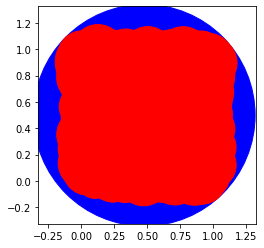

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# xr xc is radius, center of enclosing ball, r and c given data above
%gams_pull xr xc r c
xr = xr[0][0]
xc = [xc[x][1] for x in range(0,len(j))]
r = [r[x][1] for x in range(0,len(i))]
c = [[c[x][2], c[x+1][2]] for x in range(0,len(j)*len(i),2)]

circleOut = plt.Circle(xc, xr, color='blue')

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

ax.add_artist(circleOut)
for x in range(0,len(i)):
    circleIn = plt.Circle((c[x][0],c[x][1]), r[x], color='r')
    ax.add_artist(circleIn)

ax.set_xlim(-0.25, 1.25)
ax.set_ylim(-0.25, 1.25)
ax.axis('scaled')

plt.show()